In [1]:
from cascade_driver import CascadeDriver, CascadeEvent
from particle_event import CascadeParticle

particle = CascadeParticle(2212, 1e9, 0)
cas_event = CascadeEvent(emin_threshold = 1e3, particle = particle)


 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(

In [2]:
shower = CascadeDriver(cas_event)
shower.run(particle)

In [3]:
final_prt = shower.get_particles()
print(f"Iterations = {shower.get_iterations()}, particles = {len(final_prt)}")

Iterations = 87166, particles = 2723006


In [4]:
en_data = []

for i in range(len(final_prt)):
    en_data.append(final_prt[i].energy)
    
etot = 0
for ee in en_data:
    etot += ee
    
print(f"Energy conservation = {abs(etot - 1e9)/1e9}")

Energy conservation = 9.94848802343607e-05


Min = 8.54e+05 eV, Max = 1.79e+17 eV


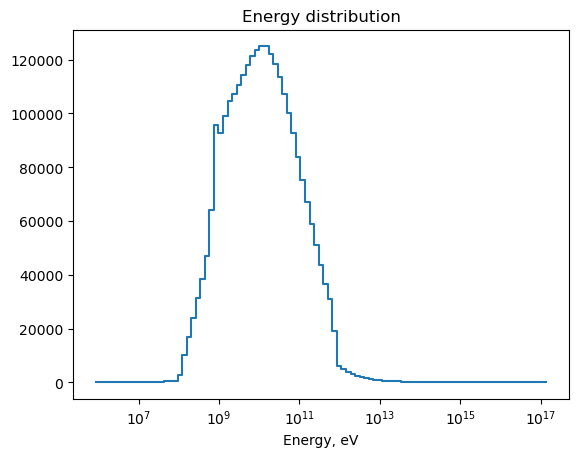

In [5]:
import matplotlib.pyplot as plt
import numpy as np


gr, cnt = np.histogram(np.log10(en_data), 100)
plt.semilogx()
plt.step(10**cnt[:-1]*1e9, gr)
plt.title("Energy distribution")
plt.xlabel("Energy, eV")
# plt.loglog(basex = 10)
# plt.stairs(gr,cnt)
# print(10**cnt)
np.min(en_data)*1e9/1e6
print(f"Min = {np.min(en_data)*1e9:0.2e} eV, Max = {np.max(en_data)*1e9:0.2e} eV")  

{111: 776190, 211: 630937, -211: 624191, 22: 170120, 2212: 92188, 2112: 78577, 321: 62918, 130: 61710, 310: 61620, -321: 56539, -2112: 29551, -2212: 27680, 3122: 12581, -3122: 6110, 3222: 5977, 3212: 5912, 3112: 4577, -3212: 3413, -3112: 3275, -3222: 3245, -11: 1225, 11: 1221, -3312: 729, 3312: 698, -3322: 682, 3322: 674, 13: 82, 12: 81, -12: 77, -14: 75, -13: 73, 14: 66, -3334: 6, 3334: 6}


Text(0.5, 1.0, 'Particle type distribution')

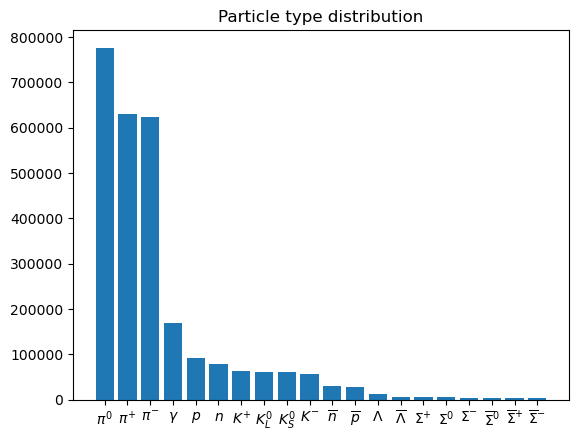

In [6]:
import particle
pid_dist = dict()

for prt in final_prt:
    pid_dist[prt.pid] = pid_dist.get(prt.pid, 0) + 1
    
pid_dist = dict(sorted(pid_dist.items(), key=lambda item: item[1], reverse=True))    
print(pid_dist)  

all_pdgs = {int(p.pdgid) : f"${p.latex_name}$" for p in particle.Particle.findall()}

ptypes = [all_pdgs[i] for i in pid_dist.keys()]
pnum = list(pid_dist.values())
plt.bar(ptypes[:20], pnum[:20])
plt.title("Particle type distribution")